In [147]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation, rc
from quantize import * 
from gain_shape_quantize import *
from bitpack import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
codebook = np.array([(2, 0), (-2, 0), (1, 1), (1, -1), (-1, 1), (-1, -1), (0, 2), (0, -2)])
normalized = codebook/np.linalg.norm(codebook, axis=1, keepdims=True)
codebook, normalized

(array([[ 2,  0],
        [-2,  0],
        [ 1,  1],
        [ 1, -1],
        [-1,  1],
        [-1, -1],
        [ 0,  2],
        [ 0, -2]]),
 array([[ 1.        ,  0.        ],
        [-1.        ,  0.        ],
        [ 0.70710678,  0.70710678],
        [ 0.70710678, -0.70710678],
        [-0.70710678,  0.70710678],
        [-0.70710678, -0.70710678],
        [ 0.        ,  1.        ],
        [ 0.        , -1.        ]]))

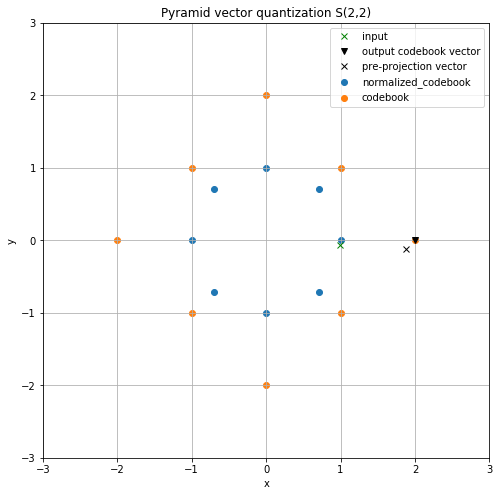

In [5]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Pyramid vector quantization S(2,2)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(( -3, 3))
ax.set_ylim((-3, 3))

line_input, = ax.plot([], [], 'gx', lw=20, label='input')
line_output, = ax.plot([], [], 'kv', lw=20, label='output codebook vector')
line_preproj, = ax.plot([], [], 'kx', lw=20, label='pre-projection vector')
ax.scatter(normalized[:,0], normalized[:,1], label='normalized_codebook')
ax.scatter(codebook[:,0], codebook[:,1], label='codebook')
ax.legend()
ax.grid()

# initialization function: plot the background of each frame
def init():
    line_input.set_data([], [])
    return (line_input,)

# animation function. This is called sequentially
def animate(t):
    pt = np.exp(2*np.pi* 0.01 * 1j * t)
    x = pt.real
    y = pt.imag
    line_input.set_data(x, y)
    act, rounded = pvq_search(np.array([x,y]), 2)
    
    line_output.set_data(rounded[0], rounded[1])
    line_preproj.set_data(act[0], act[1])

    return (line_input,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=True)

HTML(anim.to_html5_video())

In [7]:
for i in range(2, 20):
    a_g, a_f = gain_shape_alloc(10, i, -2)
    print(f"For N={i}, bits for gain= {a_g}, bits for shape={a_f}")


For N=2, bits for gain= 7, bits for shape=3
For N=3, bits for gain= 6, bits for shape=4
For N=4, bits for gain= 5, bits for shape=5
For N=5, bits for gain= 5, bits for shape=5
For N=6, bits for gain= 4, bits for shape=6
For N=7, bits for gain= 4, bits for shape=6
For N=8, bits for gain= 4, bits for shape=6
For N=9, bits for gain= 4, bits for shape=6
For N=10, bits for gain= 4, bits for shape=6
For N=11, bits for gain= 4, bits for shape=6
For N=12, bits for gain= 4, bits for shape=6
For N=13, bits for gain= 4, bits for shape=6
For N=14, bits for gain= 4, bits for shape=6
For N=15, bits for gain= 4, bits for shape=6
For N=16, bits for gain= 4, bits for shape=6
For N=17, bits for gain= 4, bits for shape=6
For N=18, bits for gain= 4, bits for shape=6
For N=19, bits for gain= 4, bits for shape=6


In [7]:
c = [-1,1]
b = encode_pvq_vector(np.array(c), 2)
print(c)
decoded = decode_pvq_vector(b, len(c), 2)
print(f'in: {c} idx: {b} decoded: {decoded}')

[-1, 1]
in: [-1, 1] idx: 4 decoded: [-1  1]


In [8]:
for c in codebook:
    b = encode_pvq_vector(np.array(c), 2)
    decoded = decode_pvq_vector(b, len(c), 2)
    print(f'in: {c} idx: {b} decoded: {decoded} success: {np.allclose(c, decoded)}')

in: [2 0] idx: 6 decoded: [2 0] success: True
in: [-2  0] idx: 7 decoded: [-2  0] success: True
in: [1 1] idx: 2 decoded: [1 1] success: True
in: [ 1 -1] idx: 3 decoded: [ 1 -1] success: True
in: [-1  1] idx: 4 decoded: [-1  1] success: True
in: [-1 -1] idx: 5 decoded: [-1 -1] success: True
in: [0 2] idx: 0 decoded: [0 2] success: True
in: [ 0 -2] idx: 1 decoded: [ 0 -2] success: True


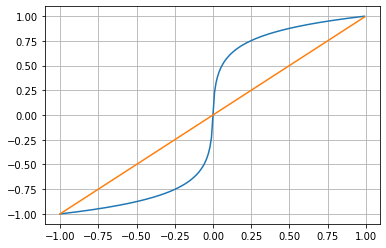

In [8]:
x = np.arange(-1, 1, 0.01)
y = mu_law_fn(x)
x_hat = inv_mu_law_fn(y)
plt.plot(x, y)
plt.plot(x, x_hat)
plt.grid()

In [13]:
for c in codebook:
    b = encode_pvq_vector(np.array(c), 2, N)
    decoded = decode_pvq_vector(b, len(c), 2, N)
    print(f'in: {c} idx: {b} decoded: {decoded} success: {np.allclose(c, decoded)}')

in: [2 0] idx: 6 decoded: [2 0] success: True
in: [-2  0] idx: 7 decoded: [-2  0] success: True
in: [1 1] idx: 2 decoded: [1 1] success: True
in: [ 1 -1] idx: 3 decoded: [ 1 -1] success: True
in: [-1  1] idx: 4 decoded: [-1  1] success: True
in: [-1 -1] idx: 5 decoded: [-1 -1] success: True
in: [0 2] idx: 0 decoded: [0 2] success: True
in: [ 0 -2] idx: 1 decoded: [ 0 -2] success: True


In [31]:
L = 10
x = np.random.rand(L) * 2 - 1
b = 41
k_fine=-2
gain, shape = quantize_gain_shape(x, len(x), b, k_fine=k_fine)
print(gain, shape)
dequantized = dequantize_gain_shape(gain, shape, b, len(x), k_fine=k_fine)

vq_error = 10*np.log10(np.mean((x-dequantized)**2))

# calculate scalar quantization error
scalar_quant = vDequantizeUniform(vQuantizeUniform(x, int(b//len(x))), int(b//len(x)))
sq_error = 10*np.log10(np.mean((x-scalar_quant)**2))

# Calcualte FP quantization error
x = np.random.rand(10) * 2 - 1
scale_bits = 3
mantissa_bits = int((b - scale_bits)/L)
scale = ScaleFactor(np.max(x), scale_bits, mantissa_bits)
mantissa = vMantissa(x, scale, scale_bits, mantissa_bits)
fp_quant = vDequantize(scale, mantissa, scale_bits, mantissa_bits)
fp_error = 10*np.log10(np.mean((x-fp_quant)**2))

print(f"input: {x}\nvq_decoded:{dequantized} scalar_decoded: {scalar_quant} fp_decoded: {fp_quant}\nvq_err:{vq_error}dB scalar_err: {sq_error}dB fp_err:{fp_error}dB")

bits_gain: 7 bits_shape 34
original gain: 2.096183593794986
k 26 used bits 33.96013838797717
Encoded codebook vector: [ 4 -3  2 -1  4  3  0 -4 -1 -4]
Quantized shape index: 12651263935
46 12651263935
7 34
decoded gain:2.1385522808407327
k 26
Decoded codebook vector: [ 4 -3  2 -1  4  3  0 -4 -1 -4]
input: [ 0.50109109 -0.79484578 -0.50507654 -0.87120909  0.2676444   0.03753963
  0.36513157  0.92884837 -0.78289436 -0.5285729 ]
vq_decoded:[ 0.91188176 -0.68391132  0.45594088 -0.22797044  0.91188176  0.68391132
  0.         -0.91188176 -0.22797044 -0.91188176] scalar_decoded: [ 0.93333333 -0.66666667  0.4        -0.26666667  0.8         0.66666667
  0.         -0.93333333 -0.26666667 -0.93333333] fp_decoded: [ 0.62561095 -0.87585533 -0.62561095 -0.87585533  0.37536657  0.
  0.37536657  0.87585533 -0.87585533 -0.62561095]
vq_err:-26.32956462920552dB scalar_err: -28.07217127920019dB fp_err:-21.511811395114947dB


In [192]:
L = 100
bit_alloc = 32
k_fine = 0
x = np.random.rand(L) * 2 - 1
x = x /np.linalg.norm(x)
mid_idx, side_idx, theta_idx = split_band_encode(x, bit_alloc, k_fine=k_fine)
print(mid_idx, side_idx, theta_idx)
x_hat = split_band_decode(mid_idx, side_idx, theta_idx, bit_alloc, L, k_fine)
error = 10*np.log10(np.mean((x-x_hat)**2))
print(list(zip(x, x_hat)))

expected_snr = 6*bit_alloc/L
print(f'error: {error}dB expected: -{expected_snr}')

theta  0.7334548770156908
bitalloc theta, mid, side 3 18 11
encode theta: 0.7334548770156908
48446 77 2
decoded theta: 0.8975979010256552
bitalloc theta, mid, side 3 7 22
[(-0.14620531852029747, 0.0), (0.017398135984630504, 0.0), (0.06683795527800009, 0.0), (-0.12409827913871756, 0.0), (-0.03420453769318395, 0.0), (-0.0359722098692504, 0.0), (0.04545838864356778, 0.0), (-0.07783692353750894, 0.0), (0.14520670791137497, 0.0), (-0.13576840881287966, 0.0), (0.033823120351757927, 0.0), (-0.1475560813700094, 0.0), (0.01080174151777811, 0.0), (0.17871506625560218, 0.0), (-0.14229804086164172, 0.0), (-0.10004941598370329, 0.0), (0.1578032410990381, 0.0), (0.08140492740251724, 0.0), (-0.17463815578468117, 0.0), (0.04971536779331541, 0.0), (0.02883034541920324, 0.0), (0.0519876478771715, 0.0), (-0.06256131520894305, 0.0), (-0.008765833851467026, 0.0), (-0.06601545289985976, 0.0), (-0.15756236502524018, 0.0), (0.004759169694642481, 0.4408738668949674), (-0.08710145878567173, 0.0), (0.08431483363

In [212]:
bit_allocation_ms(28, 0.8453496720461388, 50, k_fine=0)

in bitallocation ms 28 0.8453496720461388 50


(3, 8, 17)

In [311]:
import logging
logging.basicConfig(level=logging.DEBUG)

In [346]:
# test quantize_gain_shape
L = 5
bit_alloc = 120
k_fine = 0
x = np.random.rand(L) * 2 - 1
# x = x /np.linalg.norm(x)
indices, bits  = quantize_gain_shape(x, bit_alloc, k_fine)
print(indices, bits, sum(bits))

# pack bits
pb = PackedBits()
pb.Size(np.ceil(sum(bits)/8).astype(np.int))
for idx, nBits in zip(indices, bits):
    pb.WriteBits(idx, nBits) # encode indices

pb.ResetPointers()  
x_hat = dequantize_gain_shape(pb,
                          bit_alloc,
                          L,
                          k_fine)
error = 10*np.log10(np.mean((x-x_hat)**2))

expected_snr = 6.02*bit_alloc/L
print(list(zip(x, x_hat)))
scale_bits = 3
# mantissa_bits = int((bit_alloc-scale_bits)//L)
# scale = ScaleFactor(np.max(x), scale_bits, mantissa_bits)
# mantissa = vMantissa(x, scale, scale_bits, mantissa_bits)
# fp_quant = vDequantize(scale, mantissa, scale_bits, mantissa_bits)
# fp_error = 10*np.log10(np.mean((x-fp_quant)**2))
""
print(f'error: {error}dB expected: -{expected_snr} fp_error: {fp_error}dB')

DEBUG:gain_shape_quantize:Original bits_gain: 25 bits_shape 95
DEBUG:gain_shape_quantize:Splitting because bit alloc is 95
DEBUG:gain_shape_quantize:Encoded theta: 1.007544799676054
DEBUG:gain_shape_quantize:Encoded bitalloc theta: 32, mid: 30, side: 33 L:3
DEBUG:gain_shape_quantize:Splitting because bit alloc is 30
DEBUG:gain_shape_quantize:Encoded theta: 0.8186492123992318
DEBUG:gain_shape_quantize:Encoded bitalloc theta: 15, mid: 7, side: 8 L:2
DEBUG:gain_shape_quantize:Splitting because bit alloc is 33
DEBUG:gain_shape_quantize:Encoded theta: 1.3640402849976037
DEBUG:gain_shape_quantize:Encoded bitalloc theta: 17, mid: 6, side: 10 L:2
DEBUG:gain_shape_quantize:original gain: 1.3682081552032437
DEBUG:gain_shape_quantize:Actual bits_gain: 25 bits_shape 95
DEBUG:gain_shape_quantize:bits_gain: 25 bits_shape 95
DEBUG:gain_shape_quantize:bitalloc theta: 32
DEBUG:gain_shape_quantize:decoded theta: 1.0075447996968177
DEBUG:gain_shape_quantize:bitalloc theta: 32, 30, 33
DEBUG:gain_shape_qua

[1377445277, 8539, 90, 187, 56909, 27, 880, 12887505] [32, 15, 7, 8, 17, 6, 10, 25] 120


DEBUG:gain_shape_quantize:side_actual_bits: 10
DEBUG:gain_shape_quantize:left/right norm: 0.593838965710832 0.8045789440102256
DEBUG:gain_shape_quantize:left/right norm: 0.4481305345821241 0.8939612626082276
DEBUG:gain_shape_quantize:Gain bits: 25, 95
DEBUG:gain_shape_quantize:decoded gain:1.3682079616813692


[(0.0021834997512462095, -0.0025502668005699786), (0.6178745315879017, 0.6131304614959937), (0.9653263242982317, 0.9689914847669319), (-0.654530629559763, -0.6500284767723444), (0.3604921553841305, 0.36681472743362187)]
error: -46.24912981012476dB expected: -144.48 fp_error: -65.57152874175065dB


In [330]:
pvq_compute_k_for_R(3, 32)

RecursionError: maximum recursion depth exceeded in comparison

In [297]:
pvq_codebook_size(4, 3)

array([[ 1,  0,  0,  0],
       [ 1,  2,  2,  2],
       [ 1,  4,  8, 12]])

In [236]:
indices = [6,0]
bits = [4,0]

In [237]:
pb = PackedBits()
nbytes = sum(bits)//8+1
pb.Size(nbytes)
for idx, nBits in zip(indices, bits):
    pb.WriteBits(idx, nBits) # encode indices
pb.ResetPointers()    

In [238]:
for i in range(nbytes*8):
    print(i,pb.ReadBits(1))

0 0
1 1
2 1
3 0
4 0
5 0
6 0
7 0


In [215]:
pb.GetPackedData()

b'\x80\x00'

In [138]:
R = 2; L = 4;
R / L + 0.5 * np.log2(L) - k_fine

1.5

In [125]:
11//2

5

In [687]:
L = 4
K = 5
N = pvq_codebook_size(L,K)
codebook = []
oops = False
for b in range(N[L][K]):
#     cb = decode_pvq_vector(b, L, K, N)
    cb = decoder(b, L, K, N).step_1()   
    if np.sum(abs(cb)) != K:
        print(b, "l1 norm is not K")
    # Test to see if it's already in there
    for i,cb2 in enumerate(codebook):
        if np.allclose(cb2, cb):
            print("Found duplicate vector", i, b, cb2, cb)
            oops = True
    codebook.append(cb)
    if oops:
        break

print(np.array(codebook))

[[ 0  0  0  5]
 [ 0  0  0 -5]
 [ 0  0  1  4]
 ...
 [-4 -1  0  0]
 [ 5  0  0  0]
 [-5  0  0  0]]


In [678]:
decoder(22, L, K, N).step_1()

12
14
1 2 2
18
2 2 2
22
k 1


array([-1,  1,  1])

In [542]:
N

array([[  1,   0,   0,   0,   0,   0],
       [  1,   2,   2,   2,   2,   2],
       [  1,   4,   8,  12,  16,  20],
       [  1,   6,  18,  38,  66, 102]])

In [266]:
# x = np.array([0.53963551,  0.94695102,  0.19858073, -0.54743883])
x = np.array([-0.68288664, -0.68028159, -0.09013877, -0.16080877])
x /= np.linalg.norm(x)
print(x)
y, pre_search = pvq_search(x, 5)
y, pre_search #, np.round(y), y - np.round(y)

[-0.69584506 -0.69319058 -0.09184924 -0.16386027]
[2. 2. 0. 0.]
Remaining pulses: 1.0


(array([2.11535831, 2.10728872, 0.27922028, 0.4981327 ]),
 array([-2, -2,  0, -1]))

In [730]:
nlines = AssignMDCTLinesFromFreqLimits(1024, 48000)
print(nlines)
# sf_bands = ScaleFactorBands(1024)

[  4.   5.   4.   4.   5.   5.   6.   6.   7.   8.   9.  10.  12.  14.
  16.  19.  24.  30.  38.  47.  56.  76. 107. 149. 363.]
